# **Toy Models**


Here I will develop a couple of toy models to show the basic workflow to implement any feedforward neural network. This models will be the following:

- Regression model with 2 features and 1 labels
- Classification model with 2 features and 3 labels
- Classification model for the iris setosa dataset
- Classification model with 2 features and 2 labels, with nonlinear data

The data for the first all the models but the iris-setosa model will be generated only for training purpose.


## Regression model with 2 features and 1 label

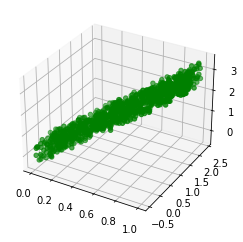

In [3]:
# Generationg data
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,1000)
y = x * 0
z = x * 0
for i in range(len(x)):
  rand = np.random.rand()
  rand = rand - .5
  y[i] = 2*x[i] + rand

for i in range(len(x)):
  rand = np.random.rand()
  rand = rand - .5
  z[i] = 3*x[i] + rand

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, color = 'green')



Epoch: 0   Error: 0.18072805516142357
Epoch: 10   Error: 0.08924120572149445
Epoch: 20   Error: 0.11854359038597653
Epoch: 30   Error: 0.09834804565808467
Epoch: 40   Error: 0.09386158644878352
Epoch: 50   Error: 0.09824065910513116
Epoch: 60   Error: 0.08588460873336227
Epoch: 70   Error: 0.08329838364560825
Epoch: 80   Error: 0.08565816701169039
Epoch: 90   Error: 0.07563780823683375
Parameter containing:
tensor([[1.9383, 0.0064]], dtype=torch.float64, requires_grad=True) Parameter containing:
tensor([0.0152], dtype=torch.float64, requires_grad=True)


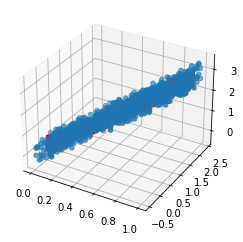

In [15]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
## We will treat y as the label and x,z as the features

######## Prepare the data ###################

x_in = np.array([x,z])
y_in = np.array([y])

x_in = x_in.T
y_in = y_in.T

features = torch.tensor(x_in, dtype = float)
labels = torch.tensor(y_in, dtype = float)

###### Create the dataset and get the dataloader ready ###########


class dataset():
  def __init__(self, features, labels):
    self.data = features
    self.labels = labels
  def __getitem__(self, index):
    return self.data[index], self.labels[index]
  def __len__(self):
    return len(self.data)

dataloader = DataLoader(dataset(features, labels), batch_size=100, shuffle=100)

###### Create the model ###############

class Regression(torch.nn.Module):
  def __init__(self, n_input, n_output):
    super(Regression, self).__init__()
    self.layer = torch.nn.Linear(n_input, n_output, dtype = float)
  def forward(self, data):
    out = self.layer(data)
    return out


###### Train the model ############

n_input = 2 # Number of features
n_output = 1 # Value to predict
learning_rate = 0.01

model = Regression(n_input, n_output)

criteria = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_epochs = 100

for epoch in range(n_epochs):
  for i, (feat, labe) in enumerate(dataloader):
    y_predicted = model(feat)
    J = criteria(y_predicted, labe)
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % 10 == 0:
    print('Epoch:', epoch, '  Error:', J.item())

w,b = model.parameters()

print(w,b)



#### Plot results ######
x_model = x
z_model = z
y_model = w[0][0].item()*x_model + w[0][1].item()*z_model + b[0].item()

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.plot3D(x_model,y_model,z_model, color = 'red')
ax.scatter(x,y,z)

## Classification model with 2 features and 3 labels

Note that the data generated here is of three categories that are agrupated in clusters. This is shown in the next plot. In principle, what we want is to divide the x, y space and thus been able to classify these points

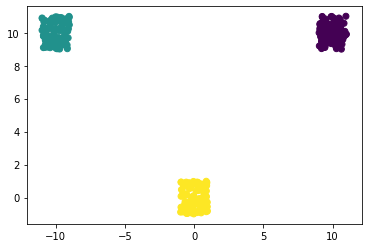

In [17]:
# Generating data for classification
# We will generate data around two points in y, which we will clasify
import torch
import matplotlib.pyplot as plt
import numpy as np
x1_center = -10
y1_center = 10

x2_center = 10
y2_center = 10

x3_center = 0
y3_center = 0


n_data = 100
N = 3*n_data
x_1 = np.zeros(N)
y_1 = np.zeros(N)
z_1 = np.zeros(N)
lab = np.zeros((N,3))

for i in range(n_data):
  x_1[i] = x1_center + 2 * np.random.rand() - 1
  x_1[n_data + i] = x2_center + 2 * np.random.rand() - 1
  x_1[2*n_data + i] = x3_center + 2 * np.random.rand() - 1
  z_1[i] = 1
  lab[i][0] = 1
  z_1[n_data+i] = 0
  lab[n_data + i][1] = 1
  z_1[2*n_data+i] = 2 
  lab[2*n_data + i][2] = 1
  y_1[i] = y1_center + 2 * np.random.rand() - 1
  y_1[n_data + i] = y2_center + 2 * np.random.rand() - 1
  y_1[2*n_data + i] = y3_center + 2 * np.random.rand() - 1
  
plt.scatter(x_1, y_1, c = z_1)



Let's generate a model for this data

In [20]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
## We will treat y as the label and x,z as the features

######## Prepare the data ###################

x_in = np.array([x_1,y_1])
y_in = np.array(z_1)

x_in = x_in.T


features = torch.tensor(x_in, dtype = float)
labels = torch.tensor(y_in, dtype = float)

###### Create the dataset and get the dataloader ready ###########


class dataset():
  def __init__(self, features, labels):
    self.data = features
    self.labels = labels
  def __getitem__(self, index):
    return self.data[index], self.labels[index]
  def __len__(self):
    return len(self.data)

dataloader = DataLoader(dataset(features, labels), batch_size=100, shuffle=100)

###### Create the model ###############

class Regression(torch.nn.Module):
  def __init__(self, n_input, n_output):
    super(Regression, self).__init__()
    self.layer = torch.nn.Linear(n_input, n_output, dtype = float)
  def forward(self, data):
    out = self.layer(data)
    return out


###### Train the model ############

n_input = 2 # Number of features
n_output = 3 # Value to predict
learning_rate = 0.01

model = Regression(n_input, n_output)

criteria = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_epochs = 100

for epoch in range(n_epochs):
  for i, (feat, labe) in enumerate(dataloader):
    y_predicted = model(feat)
    J = criteria(y_predicted, labe.long())
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % 10 == 0:
    print('Epoch:', epoch, '  Error:', J.item())

w,b = model.parameters()

print(w,b)


Epoch: 0   Error: 3.707935605435903
Epoch: 10   Error: 0.548161996633817
Epoch: 20   Error: 0.32364215548666253
Epoch: 30   Error: 0.21205406315147632
Epoch: 40   Error: 0.1606443979114021
Epoch: 50   Error: 0.13895907703890287
Epoch: 60   Error: 0.10593465789771113
Epoch: 70   Error: 0.06751425487927169
Epoch: 80   Error: 0.06053419627305383
Epoch: 90   Error: 0.0616049132582652
Parameter containing:
tensor([[ 0.8256, -0.0896],
        [ 0.1975,  0.0193],
        [ 0.4939, -0.5315]], dtype=torch.float64, requires_grad=True) Parameter containing:
tensor([-1.3435, -1.9751,  1.1434], dtype=torch.float64, requires_grad=True)


With the model trained, let's scan the configuration x,y space. Note that the model is able to divide the space in three depending on the label.

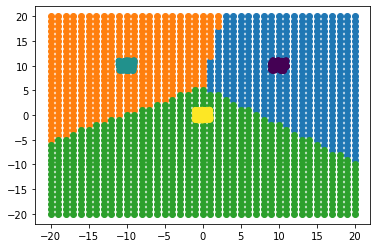

In [27]:
zeros = []
unos = []
dos = []

with torch.no_grad():
  for i in range(41):
    for j in range(41):
      test = torch.tensor([[i-20,j-20]], dtype=float)
      ## Prediction ##
      out = model(test)

      _, value = torch.max(out,1)
      #print(.item())
      if value == 0:
        zeros.append([i-20,j-20])
      elif value == 1:
        unos.append([i-20,j-20])
      else:
        #print(dos)
        dos.append([i-20,j-20])

zeros = np.array(zeros)
unos = np.array(unos)
dos = np.array(dos)

plt.scatter(zeros[:,0], zeros[:,1])
plt.scatter(unos[:,0], unos[:,1])
plt.scatter(dos[:,0], dos[:,1])
plt.scatter(x_1, y_1, c = z_1)

## Classification model for the iris setosa dataset

120

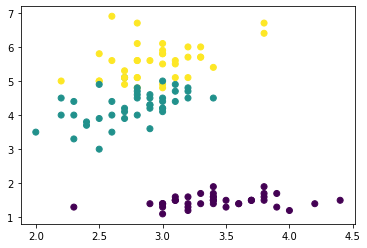

In [31]:
# Import the data

from sklearn import datasets # Import the library with the datasets
from sklearn.model_selection import train_test_split # To split the dataset
import matplotlib.pyplot as plt

iris_dataset = datasets.load_iris() # Load the dataset dictionary
features = iris_dataset["data"] # This is a numpy array 150x4
labels = iris_dataset["target"] # This is a numpy array 150


####### Splitting train and tets set ##########

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)



####### Plotting the data ################
two_columns = x_train[:,1:3]
plt.scatter(two_columns[:,0], two_columns[:,1], c = y_train)
len(y_train)

In [41]:
############# CREATE THE MODEL ##########################
import torch
import numpy as np
# Create the tensors for the model
# Create the tensor x


features = torch.tensor(x_train, dtype = float)
labels = torch.tensor(y_train, dtype = float)





###### Create the dataset and get the dataloader ready ###########


class dataset():
  def __init__(self, features, labels):
    self.data = features
    self.labels = labels
  def __getitem__(self, index):
    return self.data[index], self.labels[index]
  def __len__(self):
    return len(self.data)

dataloader = DataLoader(dataset(features, labels), batch_size=20, shuffle=100)

###### Create the model ###############

class Regression(torch.nn.Module):
  def __init__(self, n_input, n_output):
    super(Regression, self).__init__()
    self.layer = torch.nn.Linear(n_input, n_output, dtype = float)
  def forward(self, data):
    out = self.layer(data)
    return out


###### Train the model ############

_, n_input = features.shape # Number of features
n_output = 3 # Value to predict
learning_rate = 0.01

model = Regression(n_input, n_output)

criteria = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_epochs = 100

for epoch in range(n_epochs):
  for i, (feat, labe) in enumerate(dataloader):
    y_predicted = model(feat)
    J = criteria(y_predicted, labe.long())
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % 10 == 0:
    print('Epoch:', epoch, '  Error:', J.item())

w,b = model.parameters()

print(w,b)


Epoch: 0   Error: 0.9287469029000446
Epoch: 10   Error: 0.7513339060233243
Epoch: 20   Error: 0.6066925747948797
Epoch: 30   Error: 0.5861476526393903
Epoch: 40   Error: 0.5160441722630578
Epoch: 50   Error: 0.4543533296036917
Epoch: 60   Error: 0.39753772825932343
Epoch: 70   Error: 0.5012707329986892
Epoch: 80   Error: 0.4558074798846685
Epoch: 90   Error: 0.31214791942641673
Parameter containing:
tensor([[ 0.3914,  0.2978, -1.2418, -0.6235],
        [ 0.2065, -0.4435,  0.1762, -0.5827],
        [-0.0921, -0.8033,  0.4823,  0.3430]], dtype=torch.float64,
       requires_grad=True) Parameter containing:
tensor([ 0.5221, -0.3421, -0.3888], dtype=torch.float64, requires_grad=True)


In [42]:
##### Testing the model ########

test_features = torch.tensor(x_test, dtype = float)
test_labels = torch.tensor(y_test, dtype = float)


with torch.no_grad():
  predicted = model(test_features)
  _, value = torch.max(predicted,1)

  values_np = value.numpy()
  print(values_np)
  count = 0
  for i in range(len(values_np)):
    if values_np[i] == int(y_test[i]):
      count += 1
  print(100. * count/len(values_np))
  print(y_test)


[2 2 2 2 2 2 2 0 0 2 0 1 0 1 2 0 1 2 2 0 0 1 1 1 2 1 0 1 0 2]
100.0
[2 2 2 2 2 2 2 0 0 2 0 1 0 1 2 0 1 2 2 0 0 1 1 1 2 1 0 1 0 2]
